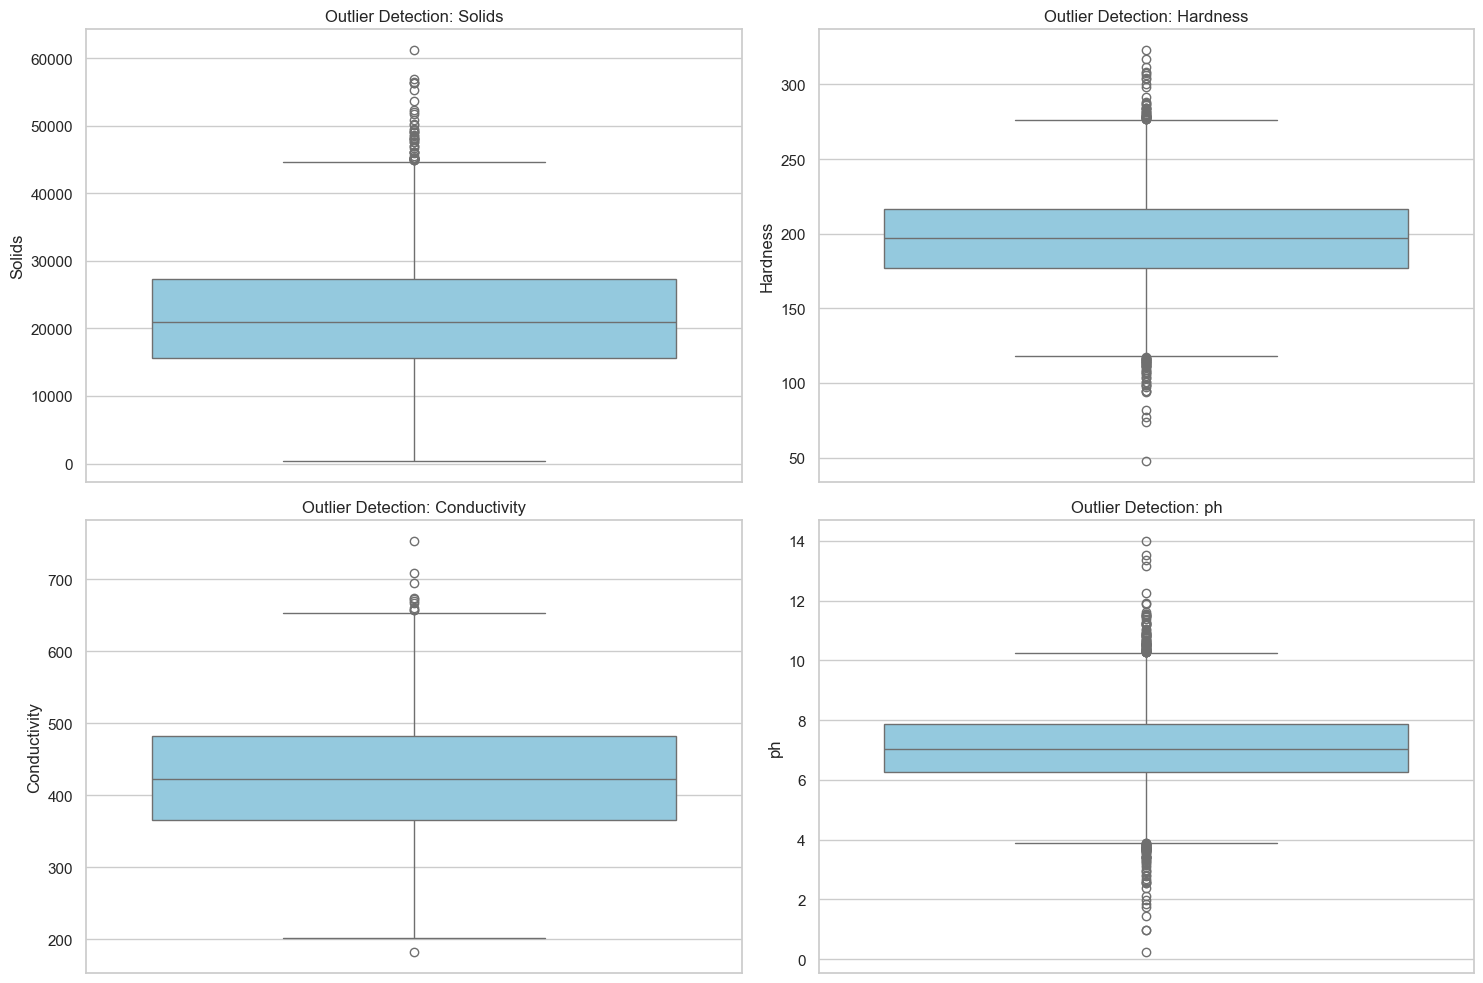

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reload the data you just saved
# (Make sure the filename matches exactly what you saved in the previous step)
file_path = 'water_potability_imputed.xlsx'
df = pd.read_excel(file_path)

# 2. Set the visual style
sns.set_theme(style="whitegrid")

# 3. Create the figure with subplots
plt.figure(figsize=(15, 10))

# The columns we want to inspect for weird values
cols_to_check = ['Solids', 'Hardness', 'Conductivity', 'ph']

for i, col in enumerate(cols_to_check):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outlier Detection: {col}')

plt.tight_layout()
plt.show()

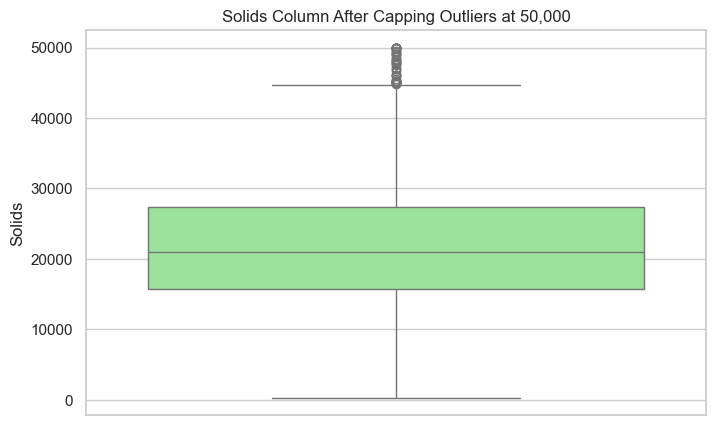

In [3]:
# Define the upper limit based on your boxplot observation
upper_limit = 50000

# Cap the outliers: If value > 50000, set it to 50000
df['Solids'] = df['Solids'].clip(upper=upper_limit)

# Now let's visualize the result to see the improvement
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Solids'], color='lightgreen')
plt.title('Solids Column After Capping Outliers at 50,000')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()

# This calculates the mean and std dev for every column, then mathematically shrinks the numbers.
X_scaled_values = scaler.fit_transform(X)


# The scaler returns a plain numpy array, so we put it back into a readable Table.
X_scaled = pd.DataFrame(X_scaled_values, columns=X.columns)


print(X_scaled.describe().round(2))

# Save the version with Imputed NaNs and Capped Outliers
#df.to_excel('water_potability_masterish.xlsx', index=False)
#print("Saved! This is your 'Golden Source' for all future modeling.")

#scaled_df = X_scaled.copy()
#scaled_df['Potability'] = y.values

#scaled_df.to_excel('water_potability_scaled.xlsx', index=False)




            ph  Hardness   Solids  Chloramines  Sulfate  Conductivity  \
count  3276.00   3276.00  3276.00      3276.00  3276.00       3276.00   
mean     -0.00     -0.00    -0.00        -0.00    -0.00         -0.00   
std       1.00      1.00     1.00         1.00     1.00          1.00   
min      -4.68     -4.53    -2.49        -4.28    -5.66         -3.03   
25%      -0.54     -0.59    -0.73        -0.63    -0.46         -0.75   
50%      -0.03      0.02    -0.12         0.01    -0.00         -0.05   
75%       0.54      0.62     0.61         0.63     0.47          0.69   
max       4.73      3.86     3.22         3.79     4.08          4.05   

       Organic_carbon  Trihalomethanes  Turbidity  
count         3276.00          3276.00    3276.00  
mean             0.00            -0.00       0.00  
std              1.00             1.00       1.00  
min             -3.65            -4.16      -3.23  
25%             -0.67            -0.62      -0.68  
50%             -0.02         